# Question 3: Unsupervised Learning
## 90-803 Machine Learning Foundations with Python (Spring 2024)
### Team 17: Yoko, Tessa, Hannah

This notebook attempts to explore question #3 of our project. <br><br>
**Question #3:** Are there any hidden structures and associations in this dataset that is worth exploring?<br>
*Target Variable:* None<br>
*Task:* Performed unsupervised learning to uncover associations in the dataset for that are worth grouping together.

## Importing the Relevant Libraries

In [2]:
# common libraries
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# unsupervised learning (clustering) libraries
from sklearn.cluster import AgglomerativeClustering, KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import scipy as sp
from scipy.cluster.hierarchy import linkage,dendrogram

## Initial Exploration

In [3]:
# read in the dataset
data = pd.read_csv("all_data.csv", index_col=0)
data.head()

Date  Year  Month          RegionName State  \
0  2000-01-31  2000      1  Los Angeles County    CA   
1  2000-01-31  2000      1  Los Angeles County    CA   
2  2000-01-31  2000      1         Cook County    IL   
3  2000-01-31  2000      1         Cook County    IL   
4  2000-01-31  2000      1       Harris County    TX   

   Bottom-Tier Average Home Value Estimate  \
0                            122826.545216   
1                            122826.545216   
2                             71689.188026   
3                             71689.188026   
4                             61195.175569   

   Top-Tier Average Home Value Estimate  Value  \
0                         400192.738911   52.3   
1                         400192.738911   52.3   
2                         302264.545103   24.9   
3                         302264.545103   24.9   
4                         217850.462915   57.4   

   Anomaly (1901-2000 base period)  1901-2000 Mean StateAbbrv  \
0                              4.5            47.8         CA   
1                              4.5            47.8         CA   
2                              2.4            22.5         IL   
3                              2.4            22.5         IL   
4                              5.6            51.8         TX   

   Initial Fees and Charges (%)  Effective Rate (%)  Term to Maturity  \
0                          0.93                8.01                15   
1                          0.81                8.20                30   
2                          0.93                8.01                15   
3                          0.81                8.20                30   
4                          0.93                8.01                15   

   Loan Amount ($thou)  Purchase Price ($thou)  Loan-to-Price Ratio (%)  \
0                103.0                   173.6                     64.7   
1                129.9                   166.8                     81.1   
2                103.0                   173.6                     64.7   
3                129.9                   166.8                     81.1   
4                103.0                   173.6                     64.7   

   Share of Total Market (%)  
0                        7.0  
1                       61.1  
2                        7.0  
3                       61.1  
4                        7.0

In [3]:
unsupervised = data[data.columns.difference(['Date', 'State', 'StateAbbrv', 'RegionName'])]
unsupervised = unsupervised.rename(columns={'Value': 'Average Temperature'})
unsupervised.head(5)

1901-2000 Mean  Anomaly (1901-2000 base period)  \
0            47.8                              4.5   
1            47.8                              4.5   
2            22.5                              2.4   
3            22.5                              2.4   
4            51.8                              5.6   

   Bottom-Tier Average Home Value Estimate  Effective Rate (%)  \
0                            122826.545216                8.01   
1                            122826.545216                8.20   
2                             71689.188026                8.01   
3                             71689.188026                8.20   
4                             61195.175569                8.01   

   Initial Fees and Charges (%)  Loan Amount ($thou)  Loan-to-Price Ratio (%)  \
0                          0.93                103.0                     64.7   
1                          0.81                129.9                     81.1   
2                          0.93                103.0                     64.7   
3                          0.81                129.9                     81.1   
4                          0.93                103.0                     64.7   

   Month  Purchase Price ($thou)  Share of Total Market (%)  Term to Maturity  \
0      1                   173.6                        7.0                15   
1      1                   166.8                       61.1                30   
2      1                   173.6                        7.0                15   
3      1                   166.8                       61.1                30   
4      1                   173.6                        7.0                15   

   Top-Tier Average Home Value Estimate  Average Temperature  Year  
0                         400192.738911                 52.3  2000  
1                         400192.738911                 52.3  2000  
2                         302264.545103                 24.9  2000  
3                         302264.545103                 24.9  2000  
4                         217850.462915                 57.4  2000

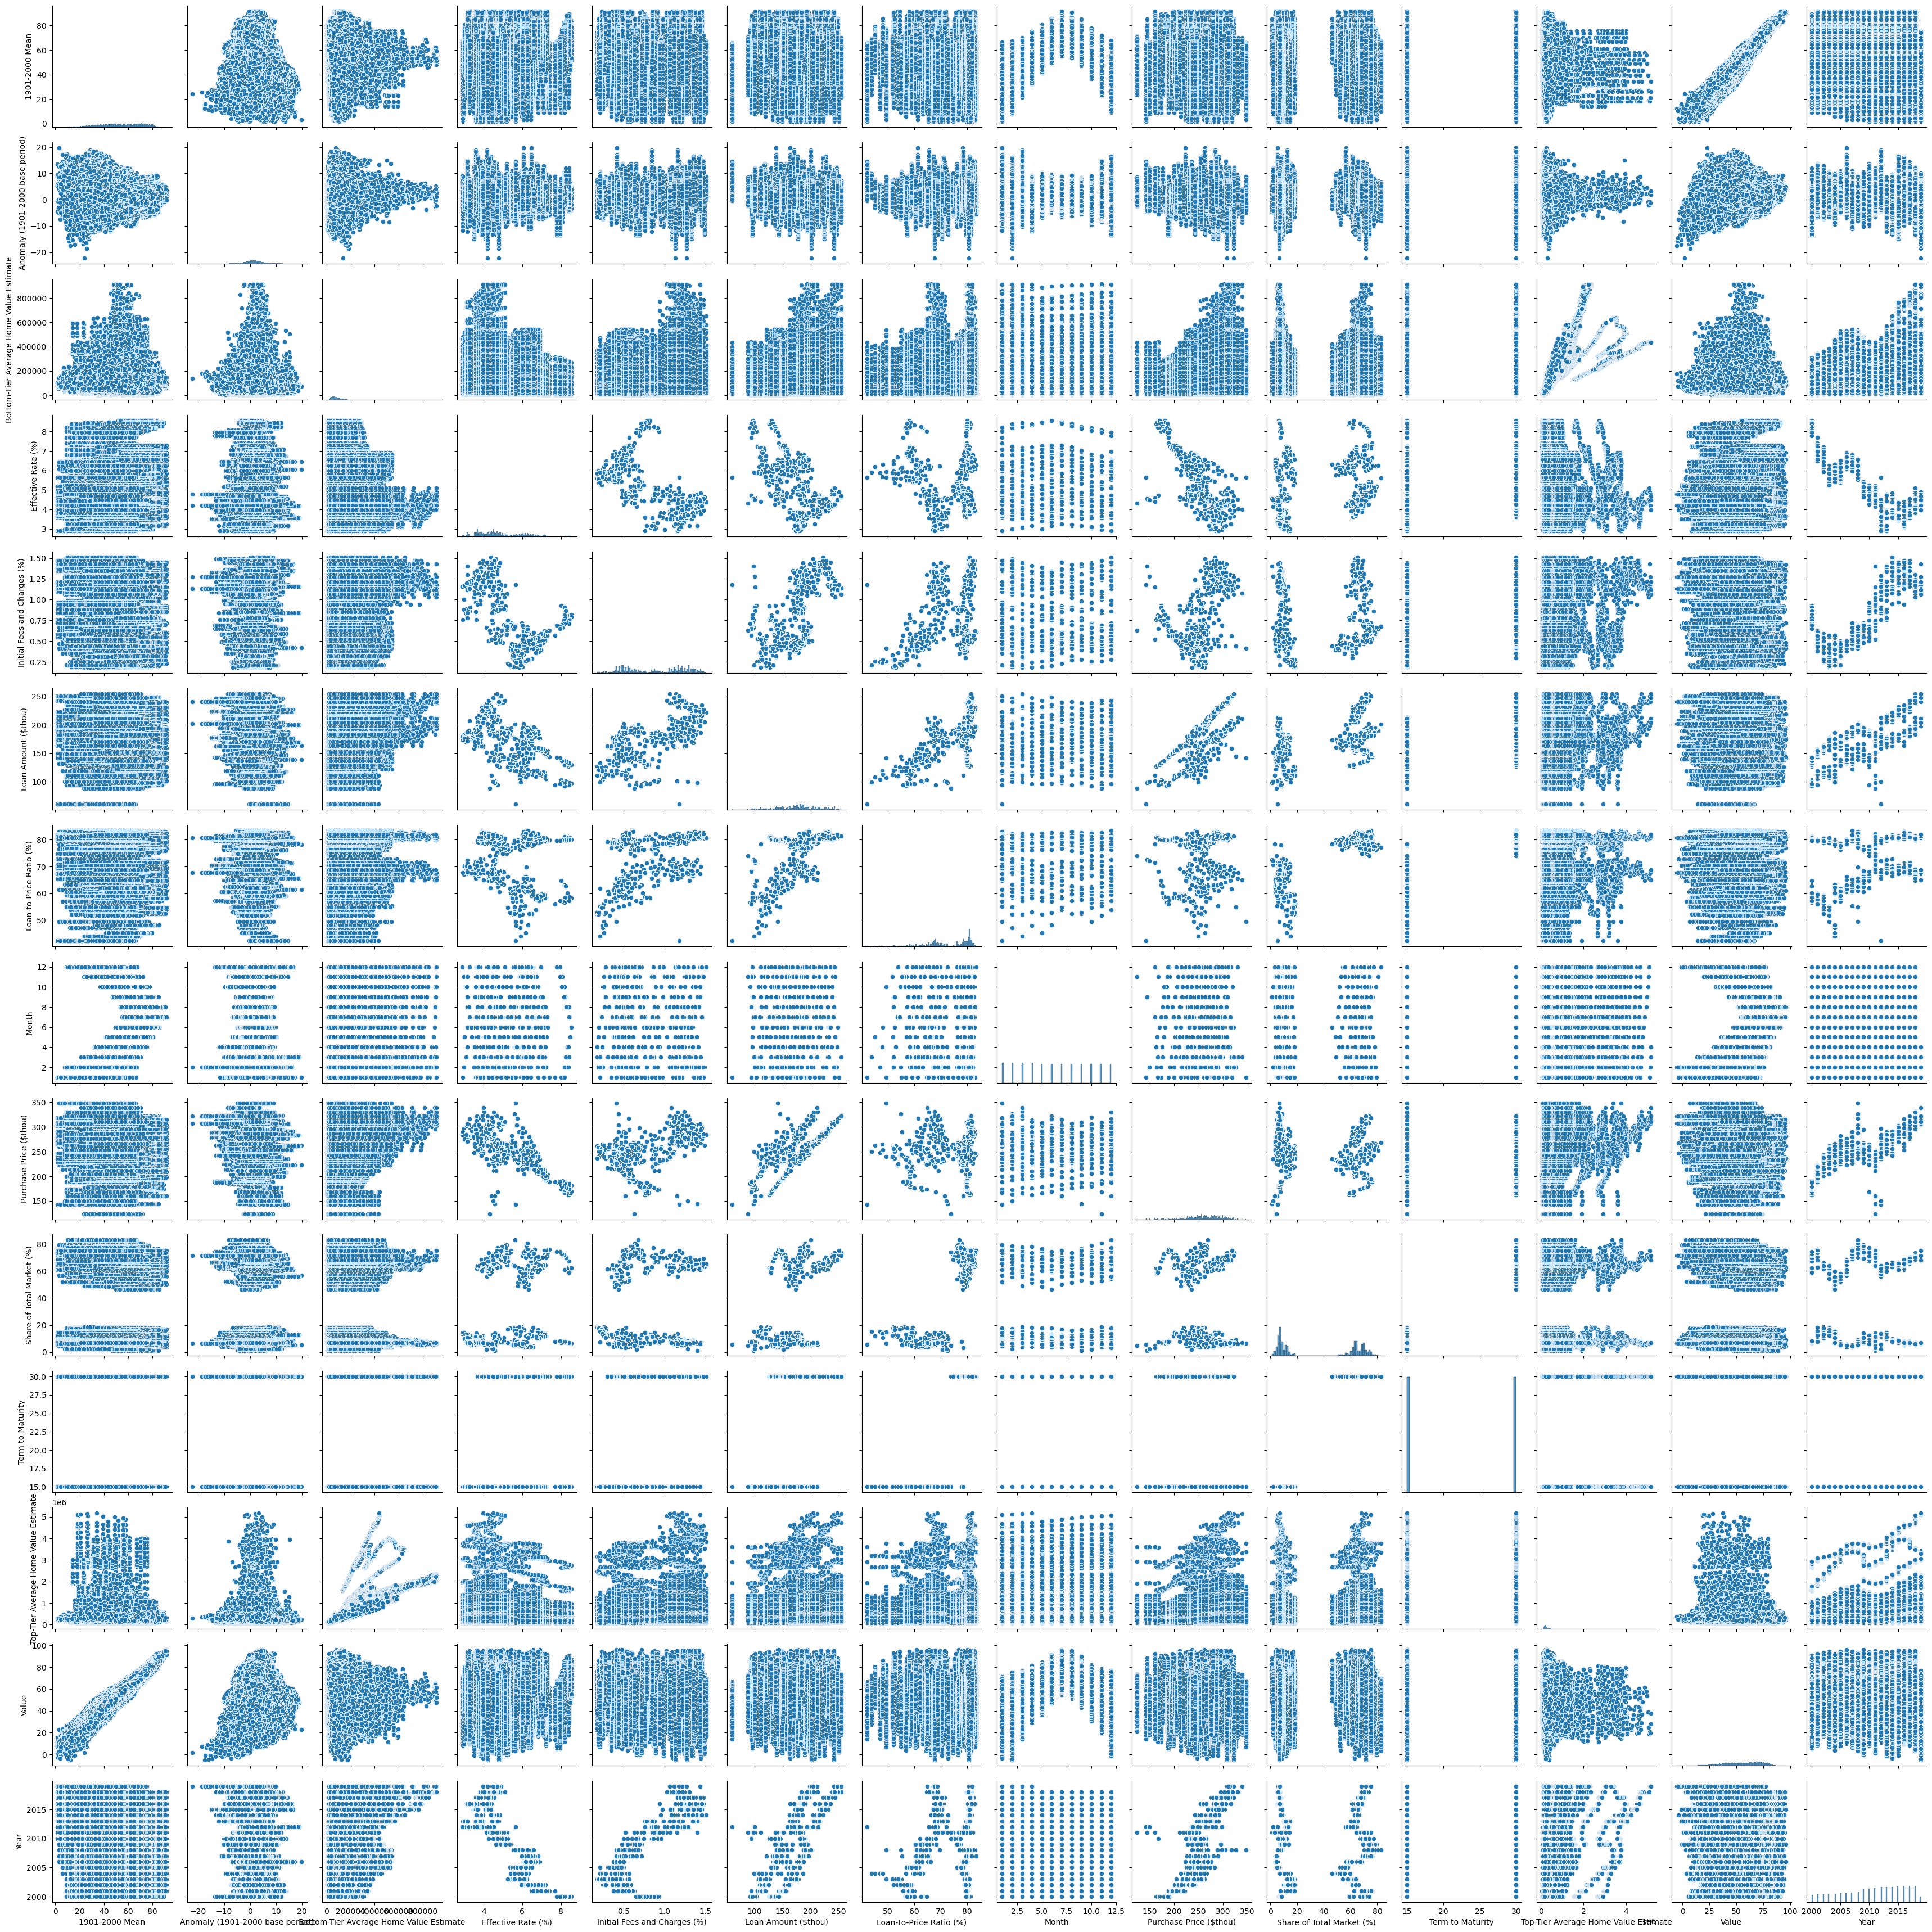

In [5]:
# sns.pairplot(unsupervised)
# plt.xticks(rotation = 45)
# plt.show()

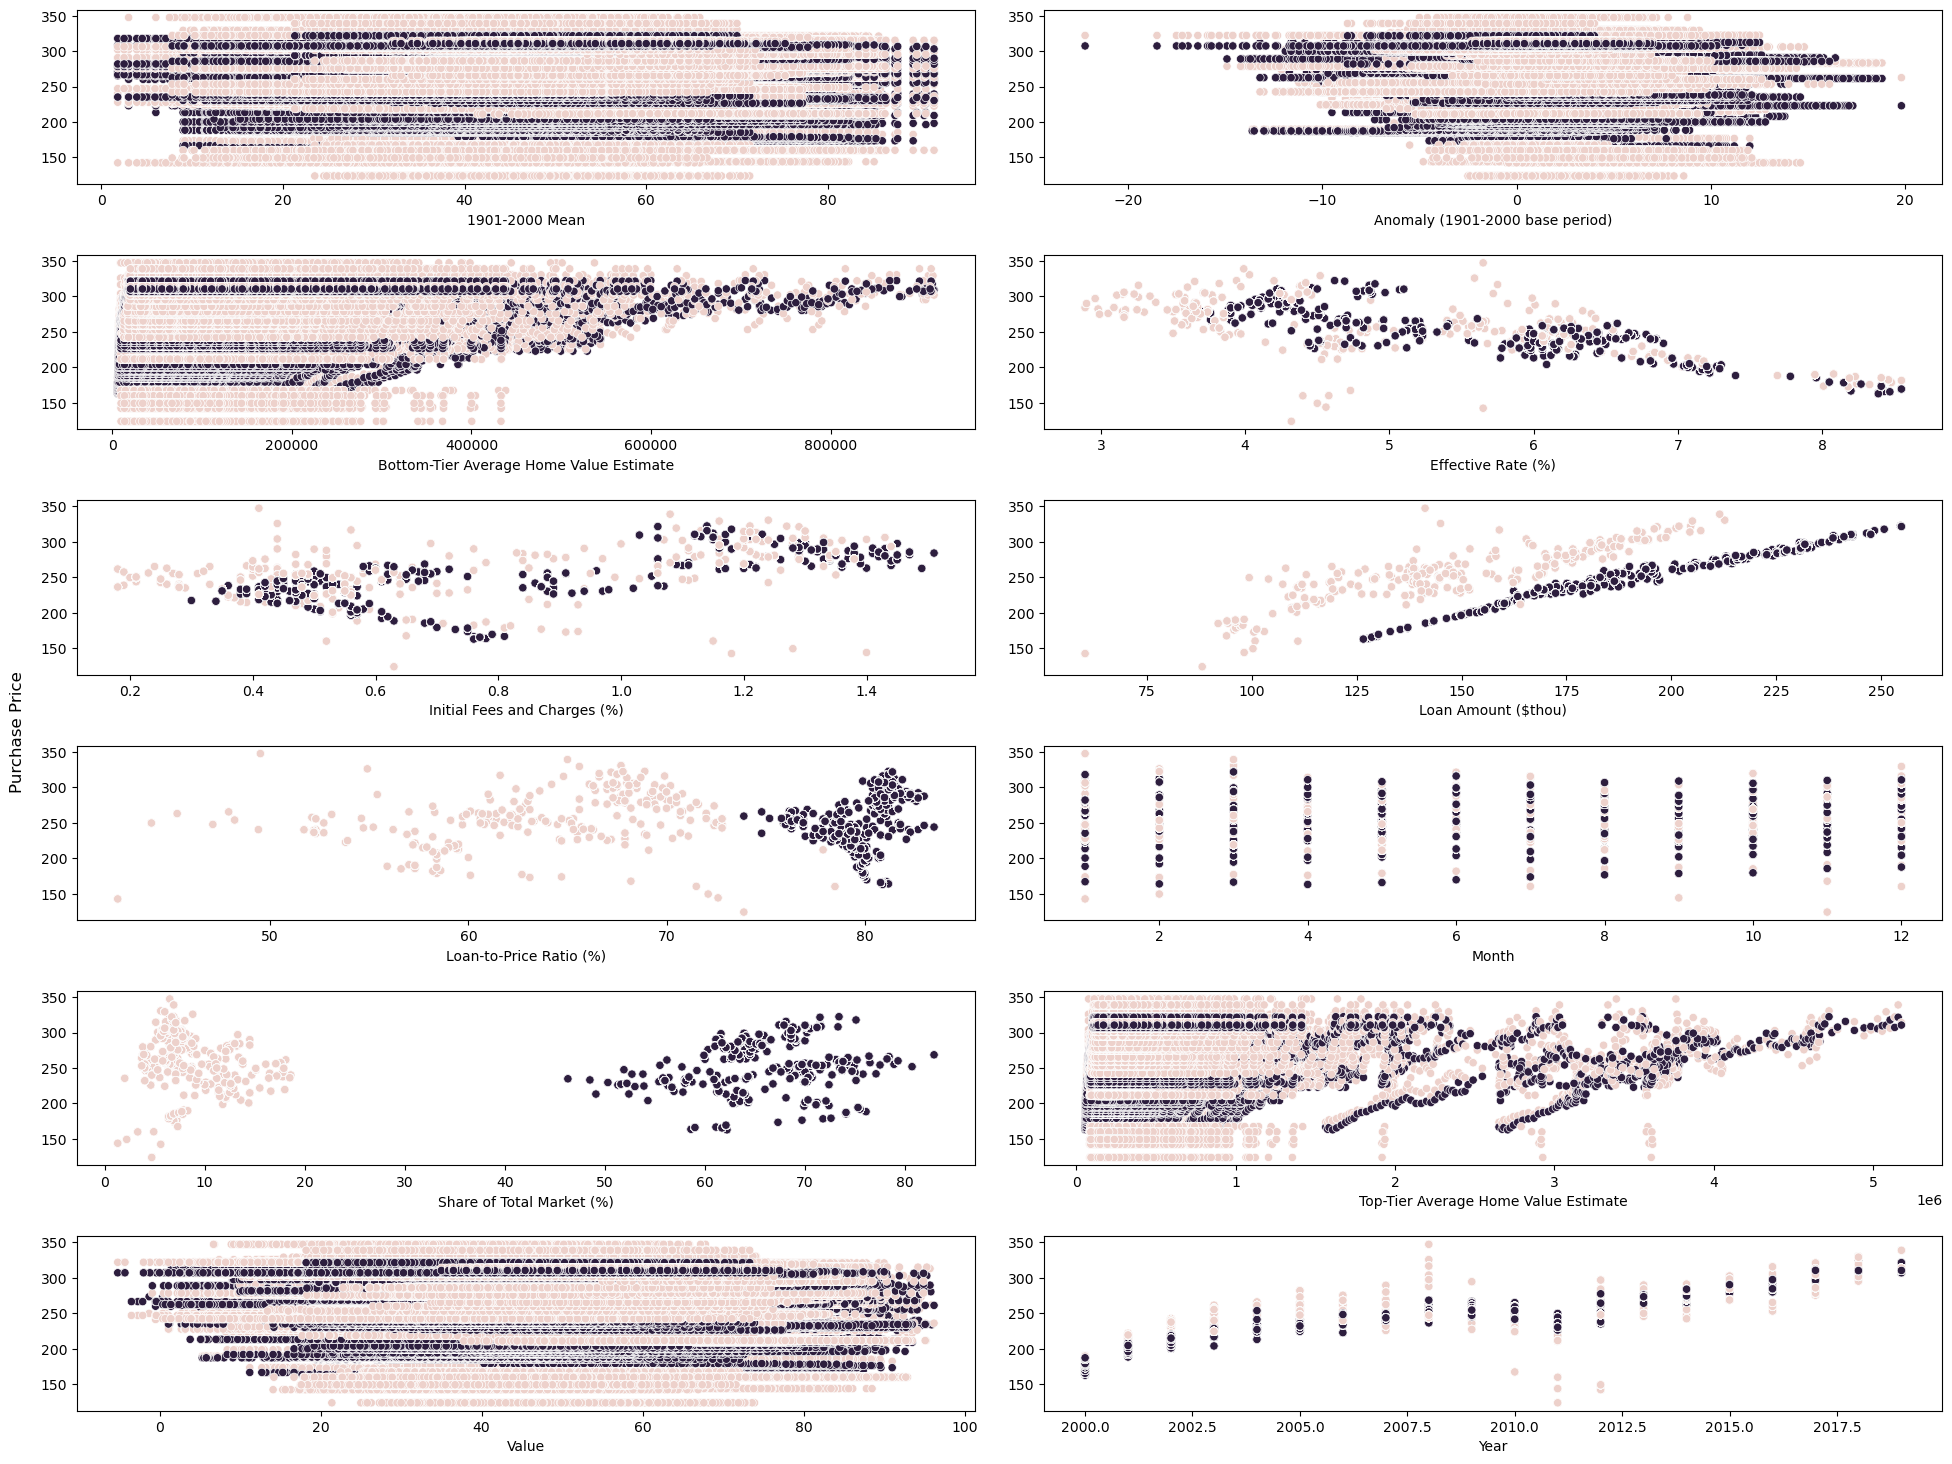

In [9]:
# col = list(unsupervised.columns.difference(['Purchase Price ($thou)', 'Term to Maturity']))

# fig, ax = plt.subplots(6,2, figsize = (20,15))
# fig.supylabel('Purchase Price')
# coor = [(i,k) for i in range(6) for k in range(2)]

# for i in range(len(coor)):
#     sns.scatterplot(data = unsupervised, y = 'Purchase Price ($thou)', x = col[i], ax = ax[coor[i]], hue = 'Term to Maturity', legend=False).set(ylabel = None)

# plt.tight_layout(pad = 2)
# plt.show()

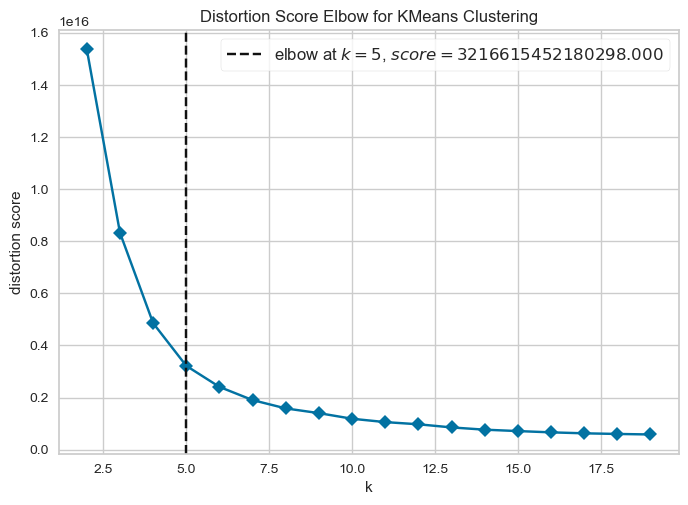

In [4]:
#Create a Kmeans model
model = KMeans(n_init='auto', random_state=1)
#run from k=2 to k=20
visualizer = KElbowVisualizer(model, k=(2,20), timings = False)
visualizer.fit(unsupervised)
visualizer.show(); 

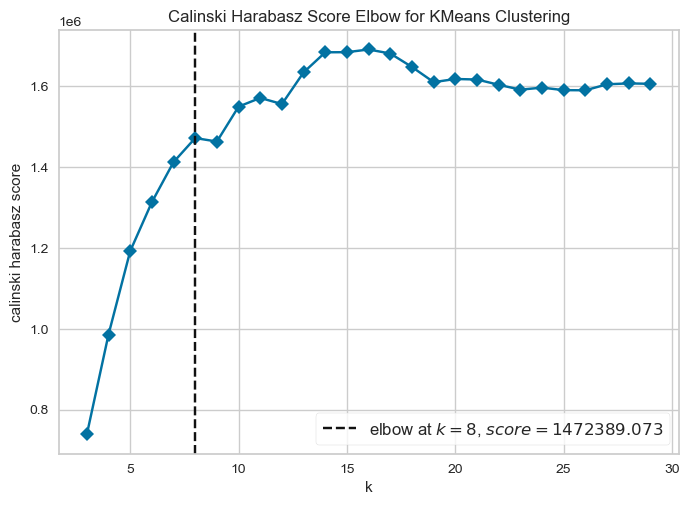

In [5]:
visualizer = KElbowVisualizer(model, k=(3,30), metric='calinski_harabasz', timings=False, locate_elbow=True)
visualizer.fit(unsupervised)
visualizer.show();


In [4]:
model = KMeans(5, n_init='auto', random_state=1)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(unsupervised) 
visualizer.show();   

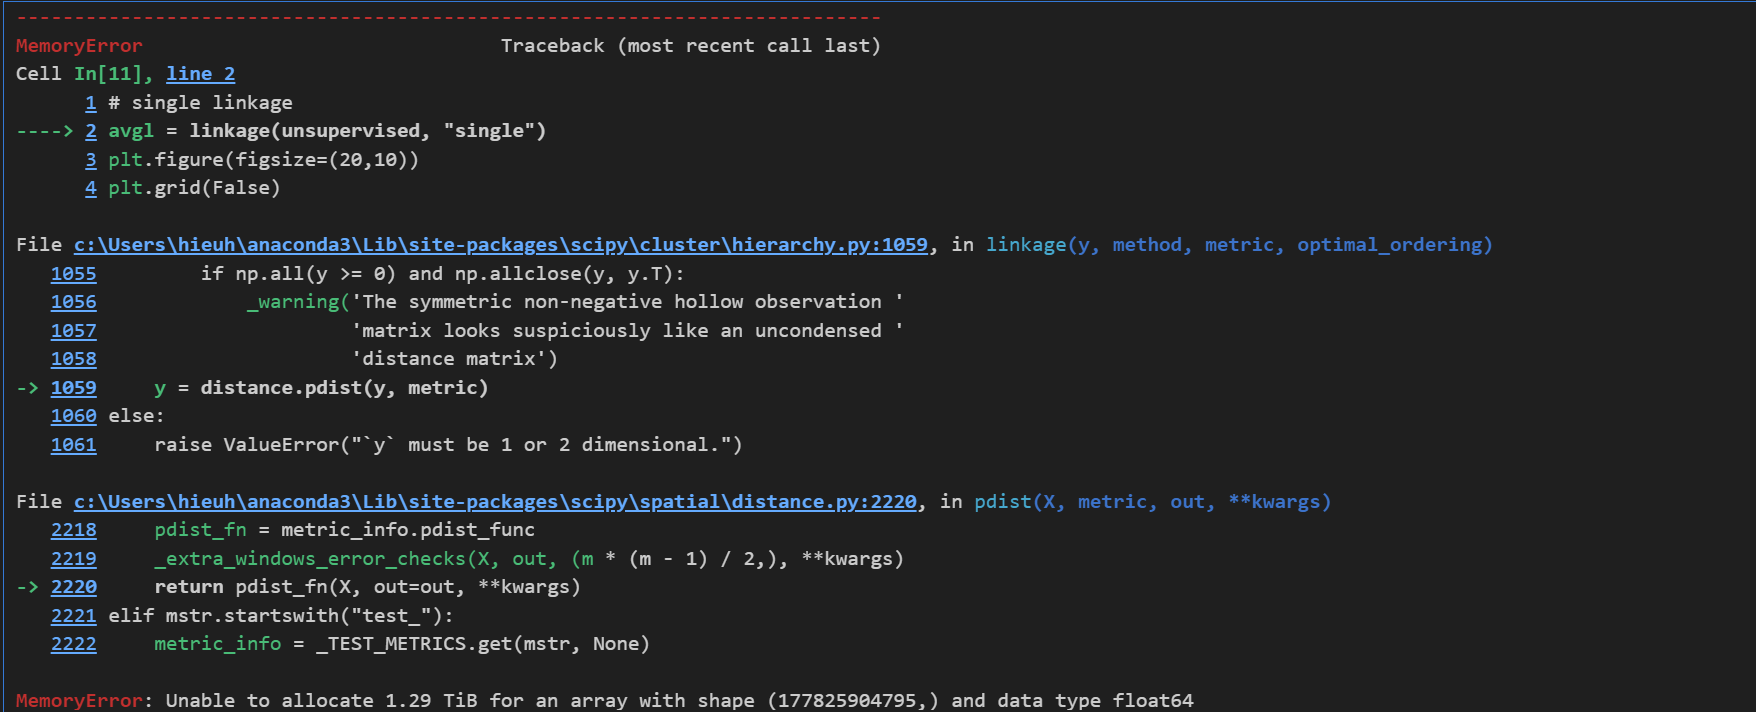

In [10]:
sub_unsupervised = unsupervised[['Average Temperature', 'Purchase Price ($thou)']][unsupervised['Year']==2018]
sub_unsupervised.head()

Average Temperature  Purchase Price ($thou)
540482                 55.6                   318.2
540483                 55.6                   308.0
540484                 23.6                   318.2
540485                 23.6                   308.0
540486                 48.2                   318.2

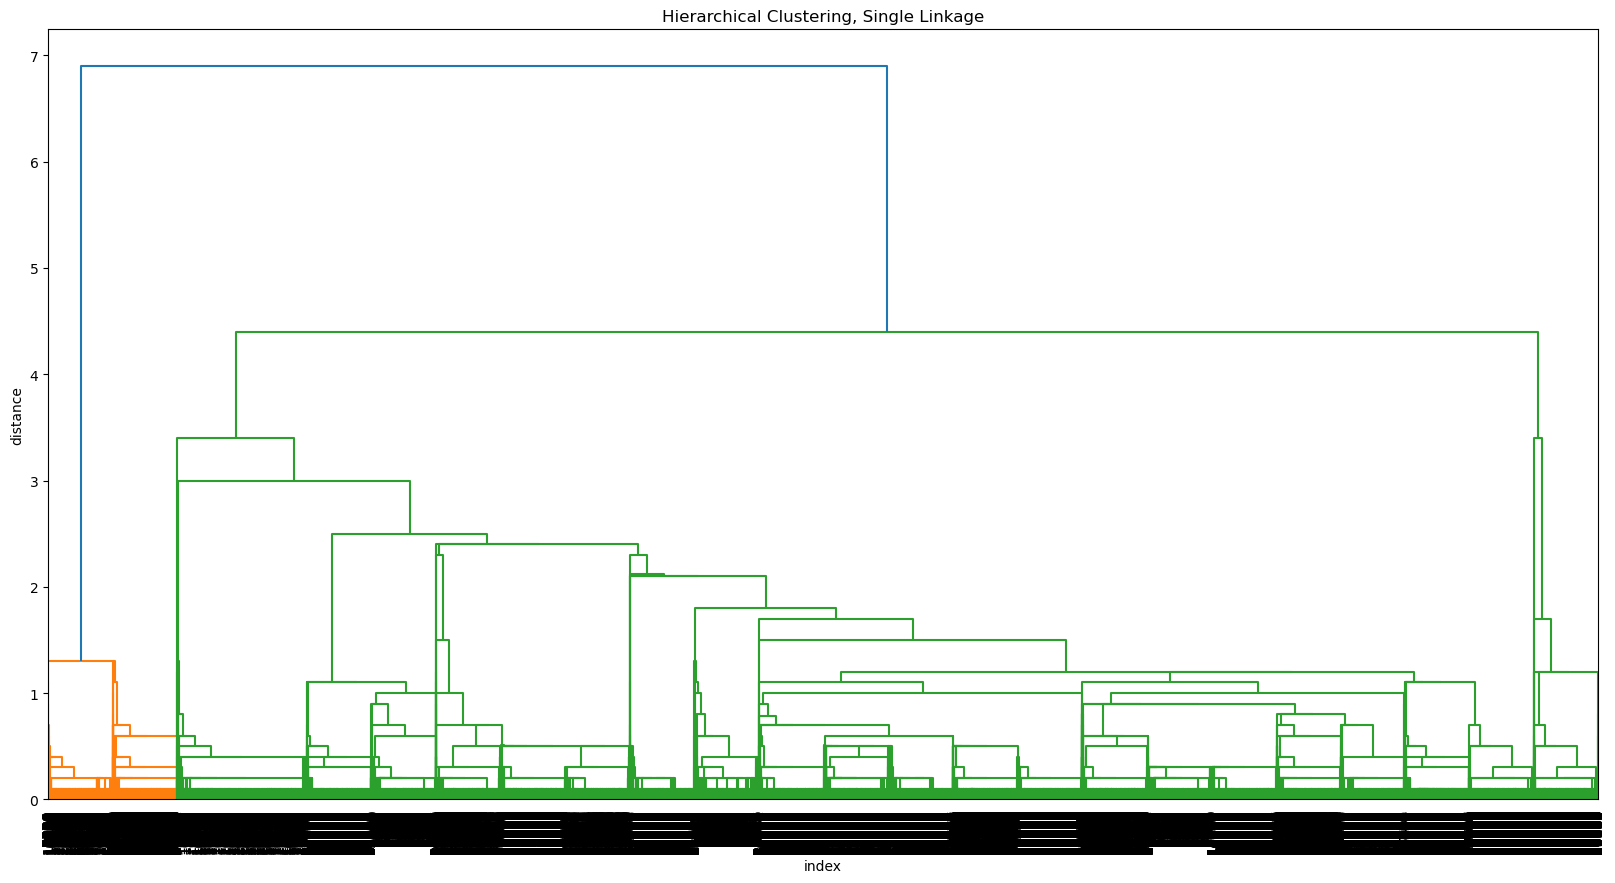

In [11]:
# single linkage
avgl = linkage(sub_unsupervised, "single")
plt.figure(figsize=(20,10))
plt.grid(False)
plt.title("Hierarchical Clustering, Single Linkage")
plt.xlabel("index")
plt.ylabel("distance")
dendrogram(avgl,leaf_font_size=10);